##### Import necessary libraries

In [154]:
import pandas as pd

##### Read data

In [155]:
df = pd.read_csv('CompanyABCProfit.csv')

In [156]:
df.head()

,Year,Profit(Rs '000)
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


##### Calculate size of dataset

In [157]:
col = "Profit(Rs '000)"
size = len(df[col])

##### Calculate number of classes

$
    2^k >= n
$

##### Note: Get the first $k$ that makes the equation true.

In [158]:
num_classes = 1

while(True):
    if 2 ** num_classes >= size:
        break
    else:
        num_classes += 1

num_classes
    

8

##### Find the class width

$
    \text{class\_width} = \frac{\text{range}}{\text{number\_of\_classes}}
$

##### Range equation:

$
    \text{range} = \text{highest\_value} - \text{lowest\_value}
$

In [159]:
rng = df[col].max() - df[col].min()

class_width = rng / num_classes

import math
class_width = math.ceil(class_width)

class_width

309

##### Determine the lower and upper limits.

##### Lower limits:
$
    \text{lower\_limits} = \text{previous\_class\_lower\_limit} + \text{class\_width}
$

##### Upper limits:
$
    \text{upper\_limits} = \text{next\_class\_lower\_limit} - 1
$

In [160]:
lower_limits = []
upper_limits = []

epoch = df[col].min()

for _ in range(num_classes):
    lower_limits.append(epoch)
    epoch += class_width

    upper_limits.append(epoch - 1)

lower_limits, upper_limits

([-413, -104, 205, 514, 823, 1132, 1441, 1750],
 [-105, 204, 513, 822, 1131, 1440, 1749, 2058])

##### Calculate frequency for every interval

In [161]:
freq_distrib = []

for index in range(num_classes):
    lower = lower_limits[index]
    upper = upper_limits[index]

    res = df[(df[col] >= lower) & (df[col] <= upper)]
    freq_distrib.append((f"{lower} - {upper}", int(len(res))))

freq_distrib

SyntaxError: invalid syntax (Temp/ipykernel_1296/2718510746.py, line 10)

##### Plot the distribution

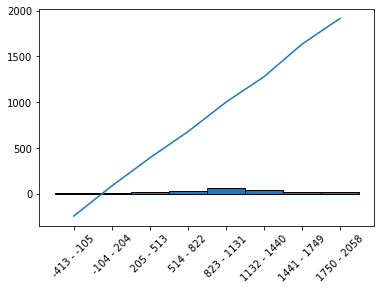

In [ ]:
import matplotlib.pyplot as plt

plt.bar([i[0] for i in freq_distrib], [i[1] for i in freq_distrib], width=1, edgecolor = "black")
plt.xticks(rotation=45)
plt.show()